In [ ]:
import numpy as np
import tensorflow
import random
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print("Shape of train_images: ",train_images.shape)
print("Shape of train_labels: ",train_labels.shape)
print("Shape of test_images: ",test_images.shape)
print("Shape of test_labels: ",test_labels.shape)

Shape of train_images:  (50000, 32, 32, 3)
Shape of train_labels:  (50000, 1)
Shape of test_images:  (10000, 32, 32, 3)
Shape of test_labels:  (10000, 1)


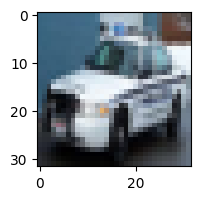

In [ ]:
id = random.randint(0,len(train_images)-1)
plt.figure(figsize=(2,2))
plt.imshow(train_images[id])
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential([
    layers.UpSampling2D(size=(7, 7)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images,train_labels, epochs=5,batch_size = 128, validation_data=(test_images, test_labels))

Epoch 1/5
391/391 [==============================] - 147s 348ms/step - loss: 0.7197 - accuracy: 0.7646 - val_loss: 0.5356 - val_accuracy: 0.8163
Epoch 2/5
391/391 [==============================] - 114s 292ms/step - loss: 0.5549 - accuracy: 0.8142 - val_loss: 0.4892 - val_accuracy: 0.8336
Epoch 3/5
391/391 [==============================] - 116s 296ms/step - loss: 0.5153 - accuracy: 0.8257 - val_loss: 0.4694 - val_accuracy: 0.8384
Epoch 4/5
391/391 [==============================] - 114s 292ms/step - loss: 0.4825 - accuracy: 0.8354 - val_loss: 0.4657 - val_accuracy: 0.8384
Epoch 5/5
391/391 [==============================] - 114s 292ms/step - loss: 0.4622 - accuracy: 0.8397 - val_loss: 0.4481 - val_accuracy: 0.8462


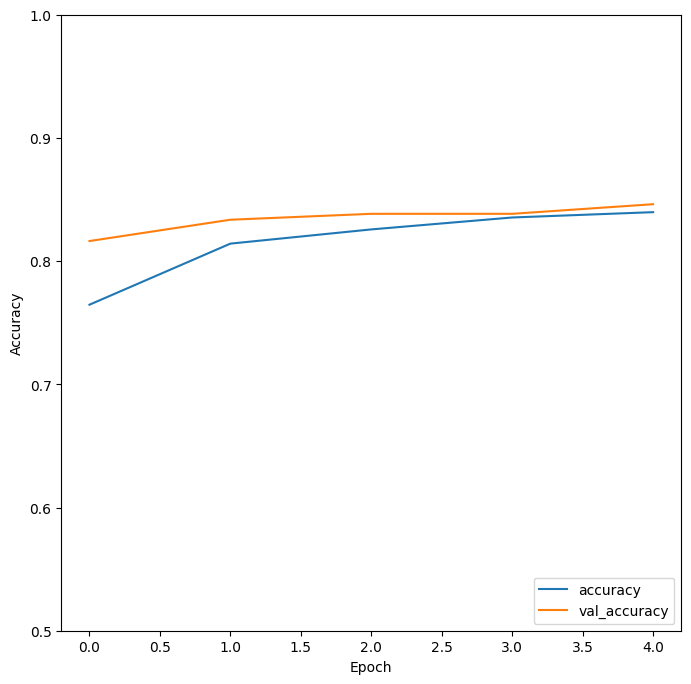

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('accuracy_graph.png')

In [ ]:
model.evaluate(train_images,train_labels,batch_size=128)

391/391 [==============================] - 96s 245ms/step - loss: 0.3475 - accuracy: 0.8803


[0.34745675325393677, 0.8802800178527832]

In [ ]:
model.evaluate(test_images,test_labels, batch_size=128)

79/79 [==============================] - 19s 242ms/step - loss: 0.4481 - accuracy: 0.8462


[0.44805487990379333, 0.8461999893188477]

1/1 [==============================] - 0s 26ms/step
predicted label is automobile


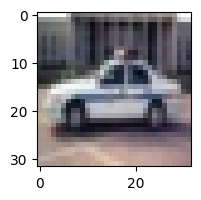

In [ ]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
image_number = random.randint(0,len(test_labels))
plt.figure(figsize=(2,2))
plt.imshow(test_images[image_number])

n = np.array(test_images[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = labels[model.predict(p).argmax()]

print("predicted label is {}".format(predicted_label))